In [1]:
# Import our dependencies
import pandas as pd
import seaborn as sea
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as py
%matplotlib inline

df_load = '/Users/nikkichappelle/hotel_bookings.csv'
df = pd.read_csv(df_load)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/15


In [2]:
# Which data is null
df.isnull()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43450,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
43451,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
43452,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
43453,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [3]:
df.shape

(43455, 32)

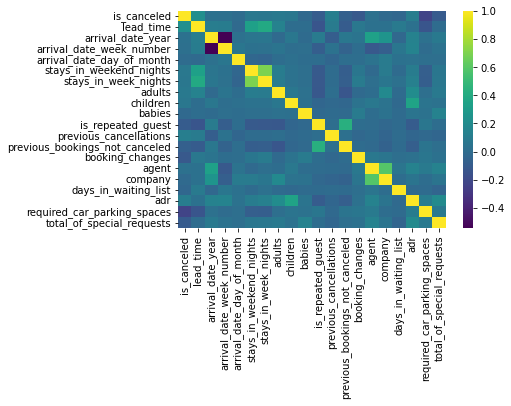

In [4]:
# Corelation matrix
df.corr()
# heatmap for the corelation matrix
sea.heatmap(df.corr(),cmap='viridis')
plt.show()

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,43455.000000,43455.000000,43455.000000,43455.000000,43455.000000,43455.000000,43455.00000,43455.000000,43451.000000,43455.000000,43455.000000,43455.000000,43455.000000,43455.000000,34823.000000,3277.000000,43455.000000,43455.000000,43455.000000,43455.000000
mean,0.280037,88.962927,2016.033828,27.699965,15.690507,1.159176,3.04301,1.864918,0.123795,0.013347,0.040916,0.093775,0.135013,0.279438,199.696063,231.411962,0.502359,94.151609,0.128639,0.605293
std,0.449022,95.082320,0.756042,13.606380,8.812260,1.136028,2.41410,0.680405,0.437829,0.116548,0.198098,1.282190,0.962821,0.718388,102.742078,130.081408,7.181002,59.641724,0.340528,0.811218
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,10.000000,2015.000000,17.000000,8.000000,0.000000,1.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,135.000000,0.000000,52.200000,0.000000,0.000000
50%,0.000000,54.000000,2016.000000,29.000000,16.000000,1.000000,2.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,223.000000,0.000000,76.500000,0.000000,0.000000
75%,1.000000,146.000000,2017.000000,38.000000,23.000000,2.000000,5.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,241.000000,308.000000,0.000000,120.600000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.00000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,20.000000,535.000000,543.000000,185.000000,508.000000,8.000000,5.000000


In [6]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
43450     True
43451     True
43452     True
43453     True
43454     True
Length: 43455, dtype: bool

In [7]:
df.duplicated().sum()

7514

In [8]:
df.isnull

<bound method DataFrame.isnull of               hotel  is_canceled  lead_time  arrival_date_year  \
0      Resort Hotel            0        342               2015   
1      Resort Hotel            0        737               2015   
2      Resort Hotel            0          7               2015   
3      Resort Hotel            0         13               2015   
4      Resort Hotel            0         14               2015   
...             ...          ...        ...                ...   
43450    City Hotel            0         74               2015   
43451    City Hotel            0         74               2015   
43452    City Hotel            0         74               2015   
43453    City Hotel            0         74               2015   
43454    City Hotel            1         74               2015   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0                   July                        27                          1   
1          

In [9]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             464
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              8632
company                           40178


In [10]:
# Total City and Resort Bookings
df['hotel'].value_counts()

Resort Hotel    40060
City Hotel       3395
Name: hotel, dtype: int64

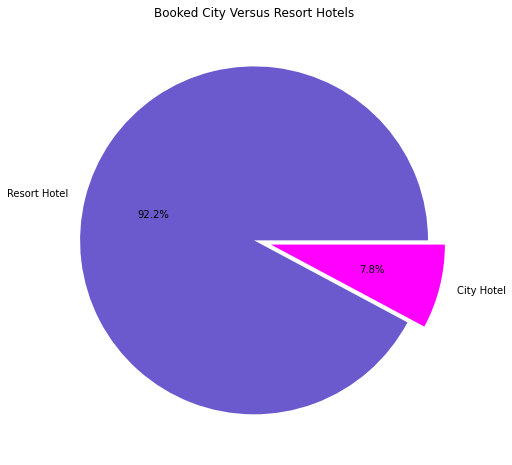

In [11]:
#Pie Chart that shows that there are more bookings for city hotels then resort hotels
colors = ["slateblue", "magenta"]
plt.subplots(figsize=(8, 8))
plt.pie(df.hotel.value_counts().values,
explode=[0,.1],
colors = colors,
labels=df.hotel.value_counts().index,
autopct='%.1f%%')
plt.title('Booked City Versus Resort Hotels')
plt.show()

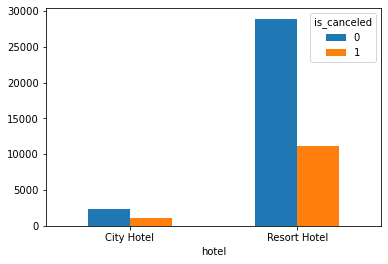

In [12]:
#shows that there is a higher cancellation for city hotels
# Creating crosstab
barplot= pd.crosstab(df.hotel,df.is_canceled)
 
# Creating barplot
pl = barplot.plot(kind="bar", stacked=False, rot=0)

In [13]:
# Total Bookings
total_bookings = len(df)
print(f"Total Bookings: {total_bookings:,}")

# Total Cancelations
total_cancelations = df["is_canceled"].sum()
total_cancel_percent = (total_cancelations/total_bookings) * 100

# Resort Cancelations
resort_cancel = df[df["hotel"] == "Resort Hotel"]["is_canceled"].sum()
resort_cancel_percent = (resort_cancel/total_cancelations) * 100

# City Cancelations
city_cancel = df[df["hotel"] == "City Hotel"]["is_canceled"].sum()
city_cancel_percent = (city_cancel/total_cancelations) * 100

print(f"Total Bookings Canceled: {total_cancelations:,} ({total_cancel_percent:.2f}% of Total Bookings)")
print(f"Resort Hotel Bookings Canceled: {resort_cancel:,} ({resort_cancel_percent:.2f}% of Total Cancelations)")
print(f"City Hotel Bookings Canceled: {city_cancel:,} ({city_cancel_percent:.2f}% of Total Cancelations)")

Total Bookings: 43,455
Total Bookings Canceled: 12,169 (28.00% of Total Bookings)
Resort Hotel Bookings Canceled: 11,122 (91.40% of Total Cancelations)
City Hotel Bookings Canceled: 1,047 (8.60% of Total Cancelations)


In [14]:
confirmed_df = df[df["is_canceled"]==0]
confirmed_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43449,City Hotel,0,74,2015,September,38,18,0,2,2,...,No Deposit,6.0,NaN,0,Transient-Party,109.0,0,0,Check-Out,9/20/15
43450,City Hotel,0,74,2015,September,38,18,0,2,2,...,No Deposit,6.0,NaN,0,Transient-Party,109.0,0,0,Check-Out,9/20/15
43451,City Hotel,0,74,2015,September,38,18,0,2,2,...,No Deposit,6.0,NaN,0,Transient-Party,109.0,0,0,Check-Out,9/20/15
43452,City Hotel,0,74,2015,September,38,18,0,2,2,...,No Deposit,6.0,NaN,0,Transient-Party,109.0,0,0,Check-Out,9/20/15


In [15]:
canceled_df = df[df["is_canceled"]==1]
canceled_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,5/6/15
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,4/22/15
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,6/23/15
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,5/11/15
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,5/29/15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43445,City Hotel,1,74,2015,September,38,18,0,2,2,...,Non Refund,6.0,NaN,0,Transient-Party,101.5,0,0,Canceled,7/6/15
43446,City Hotel,1,74,2015,September,38,18,0,2,2,...,Non Refund,6.0,NaN,0,Transient-Party,101.5,0,0,Canceled,7/6/15
43447,City Hotel,1,74,2015,September,38,18,0,2,2,...,Non Refund,6.0,NaN,0,Transient-Party,101.5,0,0,Canceled,7/6/15
43448,City Hotel,1,74,2015,September,38,18,0,2,2,...,Non Refund,6.0,NaN,0,Transient-Party,101.5,0,0,Canceled,7/6/15


In [16]:
confirmed_df['arrival_date_month'].value_counts()

August       4360
July         3387
September    3097
October      2577
March        2573
April        2550
May          2535
February     2308
June         2038
December     2017
November     1976
January      1868
Name: arrival_date_month, dtype: int64

In [17]:
canceled_df['arrival_date_month'].value_counts()

August       2112
July         1686
September    1328
April        1059
May          1024
June         1007
October       978
February      795
March         763
December      631
November      461
January       325
Name: arrival_date_month, dtype: int64

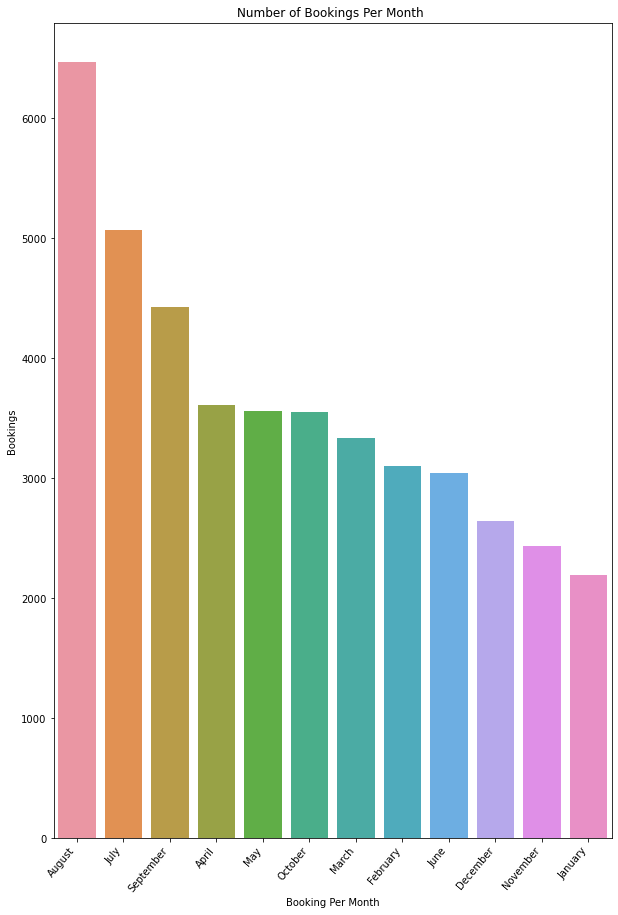

In [18]:
#like the data shows above the graph shows that august has the highest bookings per mopnth and that January has the lowest
plt.figure(figsize=(10,15))
sea.countplot(x='arrival_date_month',data=df,
order=df.arrival_date_month.value_counts().index)
plt.title('Number of Bookings Per Month ')
plt.xlabel('Booking Per Month')
plt.ylabel('Bookings')
plt.xticks(rotation=50,ha='right')
plt.show()

In [19]:
df.pivot_table("adr", index="arrival_date_year", columns="hotel", aggfunc="mean")

hotel,City Hotel,Resort Hotel
arrival_date_year,,
2015,84.696259,89.353417
2016,NaN,87.730762
2017,NaN,108.660217


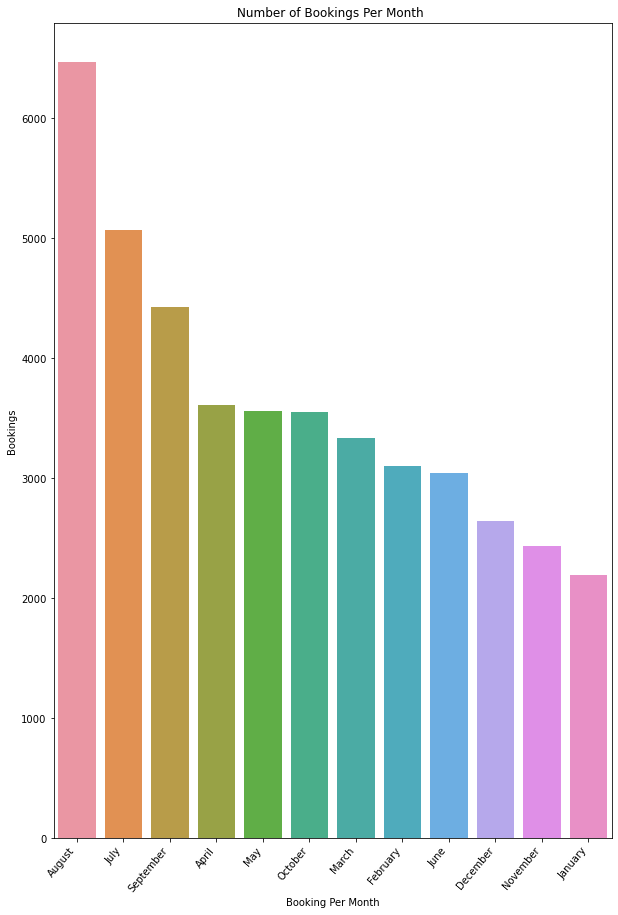

In [20]:
#like the data shows above the graph shows that august has the highest bookings per mopnth and that January has the lowest
plt.figure(figsize=(10,15))
sea.countplot(x='arrival_date_month',data=df,
order=df.arrival_date_month.value_counts().index)
plt.title('Number of Bookings Per Month ')
plt.xlabel('Booking Per Month')
plt.ylabel('Bookings')
plt.xticks(rotation=50,ha='right')
plt.show()


In [21]:
df.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP'],
      dtype=obj

In [22]:
australia=['AUS']

asia=['OMN','CN','IND','CHN','ISR','KOR','ARE','HKG','IRN','CYP','KWT','MDV','KAZ','PAK','IDN','LBN','PHL','AZE','BHR',
     'THA','MYS','ARM','JPN','LKA','JOR','SYR','SGP','SAU','VNM','QAT','UZB','NPL','MAC','TWN','IRQ','KHM','BGD','TJK',
     'TMP','MMR','LAO']

europe=['PRT','GBR','ESP','IRL','FRA','ROU','NOR','POL','DEU','BEL','CHE','GRC','ITA','NLD','DNK','RUS','SWE','EST',
       'CZE','FIN','LUX','SVN','ALB','UKR','SMR','LVA','SRB','AUT','BLR','LTU','TUR','HUN','HRV','GEO','AND','SVK',
       'MKD','BIH','BGR','MLT','ISL','MCO','LIE','MNE']
north_america=['USA','MEX','PRI','CRI','CUB','HND','NIC','GAB','PAN','SLV','GTM']

south_america=['ARG','BRA','CHL','URY','COL','VEN','SUR','PER','ECU','BOL','PRY','GUY']


africa=['MOZ','BWA','MAR','ZAF','AGO','ZMB','ZWE','DZA','TUN','CAF','NGA','SEN','SYC','CMR','MUS','COM','UGA','CIV',
       'BDI','EGY','MWI','MDG','TGO','DJI','STP','ETH','RWA','BEN','TZA','GHA','KEN','GNB','BFA','LBY','MLI','NAM',
       'MRT','SDN','SLE'] 

Others=['CYM','CPV','JAM','GIB','JEY','GGY','FJI','NZL','DOM','PLW','BHS','KNA','IMN','VGB','GLP','UMI','MYT','FRO',
       'BRB','ABW','AIA','DMA','PYF','LCA','ATA','ASM','NCL','KIR','ATF']




In [23]:

def country_bin(x):
    if x in australia:
        return 'Australia'
    elif x in asia:
        return 'Asia'
    elif x in europe:
        return 'Europe'
    elif x in north_america:
        return 'North America'
    elif x in south_america:
        return 'South America'
    elif x in africa:
        return 'Africa'
    elif x in Others:
        return 'Others'
df.country=df.country.apply(country_bin) 

In [24]:
df.country.unique()

array(['Europe', 'North America', None, 'Asia', 'South America',
       'Australia', 'Africa', 'Others'], dtype=object)

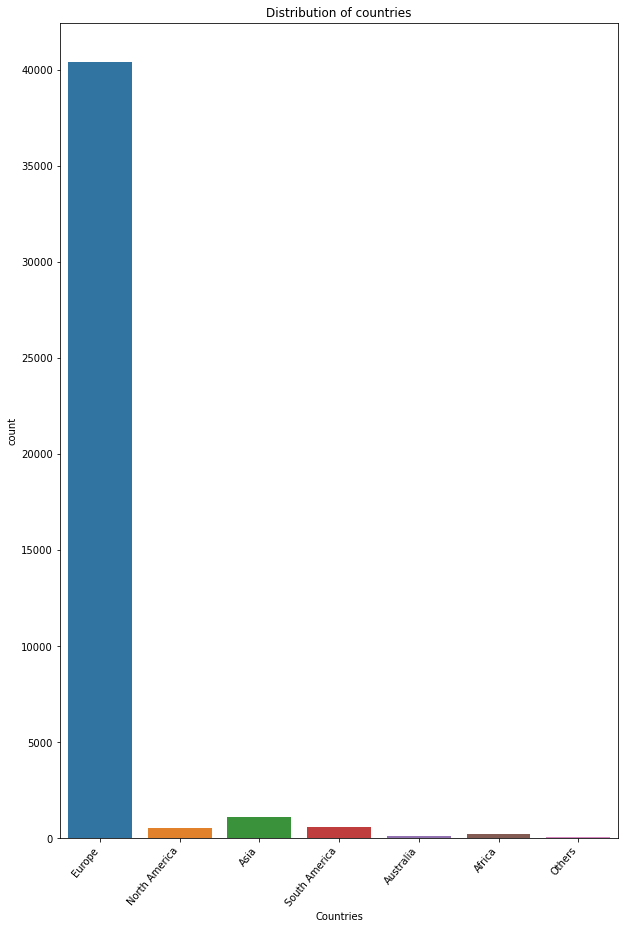

In [25]:
plt.figure(figsize=(10,15))
sea.countplot(x='country',data=df)
plt.title('Distribution of countries')
plt.xlabel('Countries')
plt.xticks(rotation=50,ha='right')
plt.show()
#Distrubtion of countries



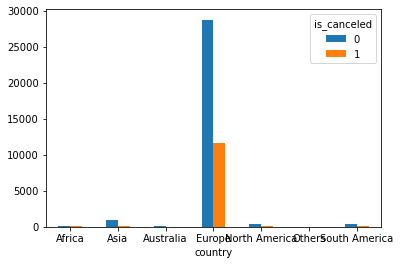

In [26]:

# Creating crosstab
barplot= pd.crosstab(df.country,df.is_canceled)
 
# Creating barplot
pl = barplot.plot(kind="bar", stacked=False, rot=0)

In [28]:
#table that shows countries and cancellations
cancel_table=pd.crosstab(df.country,df.is_canceled,margins=True)
cancel_table

is_canceled,0,1,All
country,,,
Africa,147,62,209
Asia,962,162,1124
Australia,77,15,92
Europe,28747,11681,40428
North America,452,72,524
Others,41,11,52
South America,441,121,562
All,30867,12124,42991


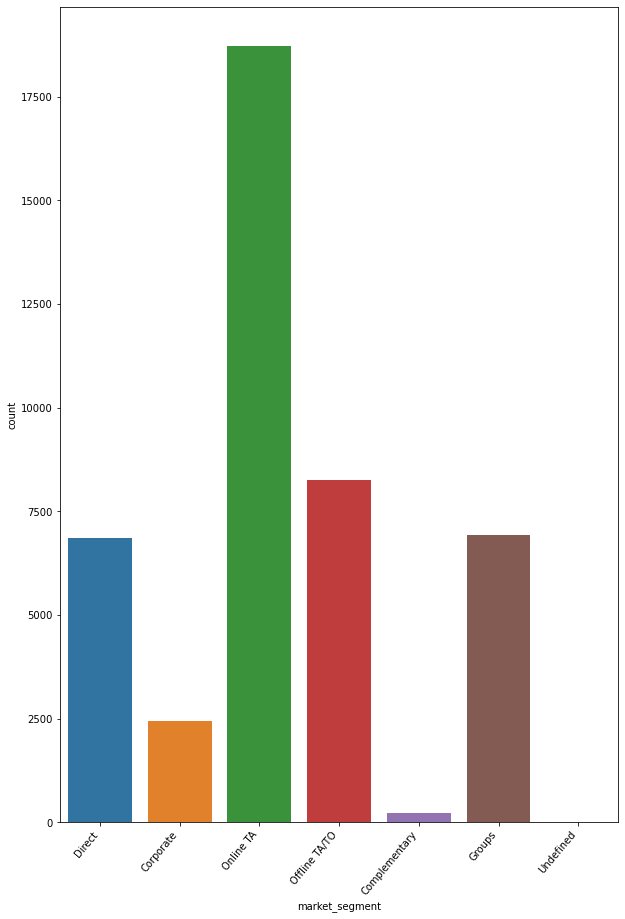

In [32]:
#market segment count
#most through online TA
plt.figure(figsize=(10,15))
sea.countplot(x='market_segment',data=df)
plt.xticks(rotation=50,ha='right')
plt.show()

In [33]:
market_segment =pd.crosstab(df.market_segment,df.is_canceled,margins=True)
market_segment

is_canceled,0,1,All
market_segment,,,
Complementary,196,35,231
Corporate,2071,383,2454
Direct,5927,925,6852
Groups,4071,2869,6940
Offline TA/TO,6796,1450,8246
Online TA,12225,6505,18730
Undefined,0,2,2
All,31286,12169,43455
